In [ ]:
import json
import corner
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

refobs = np.array([
        [-3.13531505, -13.98423491, -6.64658269],
        [-3.38360946, -15.34720671, -1.71139834],
        [-4.21540068, -13.93568105, 4.73878965],
        [-5.41469694, -13.9772912, 4.14112123],
        [-4.30711573, -12.61217154, 5.78382821]
])

all_data = {}

files = {
    'initial': '../output/fit_ech_abc_sir/initial.particles',
    'abc_abc_1': '../output/fit_ech_abc_sir/abc_1.particles',
    'abc_abc_2': '../output/fit_ech_abc_sir/abc_2.particles',
    'abc_sir_1': '../output/fit_ech_abc_sir/sir_1.particles',
    'abc_sir_2': '../output/fit_ech_abc_sir/sir_2.particles',

    'dev_dev_1': '../output/fit_ech_dev_sir/dev_1.particles',
    'dev_dev_2': '../output/fit_ech_dev_sir/dev_2.particles',
    'dev_sir_1': '../output/fit_ech_dev_sir/sir_1.particles',
    'dev_sir_2': '../output/fit_ech_dev_sir/sir_2.particles',
}

for (k, v) in files.items():
    try:
        with open(v) as json_data:
                raw_data = json.load(json_data)
                all_data[k] = {'particles' : np.array(raw_data["ensbl"]["ptpdf"]["particles"][0]).reshape(raw_data["ensbl"]["ptpdf"]["particles"][2], -1)}
                all_data[k]['weights'] = np.array(raw_data["ensbl"]["ptpdf"]["weights"][0])
                # errors.append(np.array(raw_data["ensbl_errors"]))
                # output.append(np.array(raw_data["ensbl_output"][0]).reshape(raw_data["ensbl_output"][2], -1, 3))
                json_data.close()
    except:
          pass

autorange = np.array([np.min(all_data['initial']['particles'], axis=0), np.max(all_data['initial']['particles'], axis=0)]).T
autoflag = [True for _ in autorange]

for idx in range(len(autorange)):
        if autorange[idx][0] == autorange[idx][1]:
                autoflag[idx] = False
                

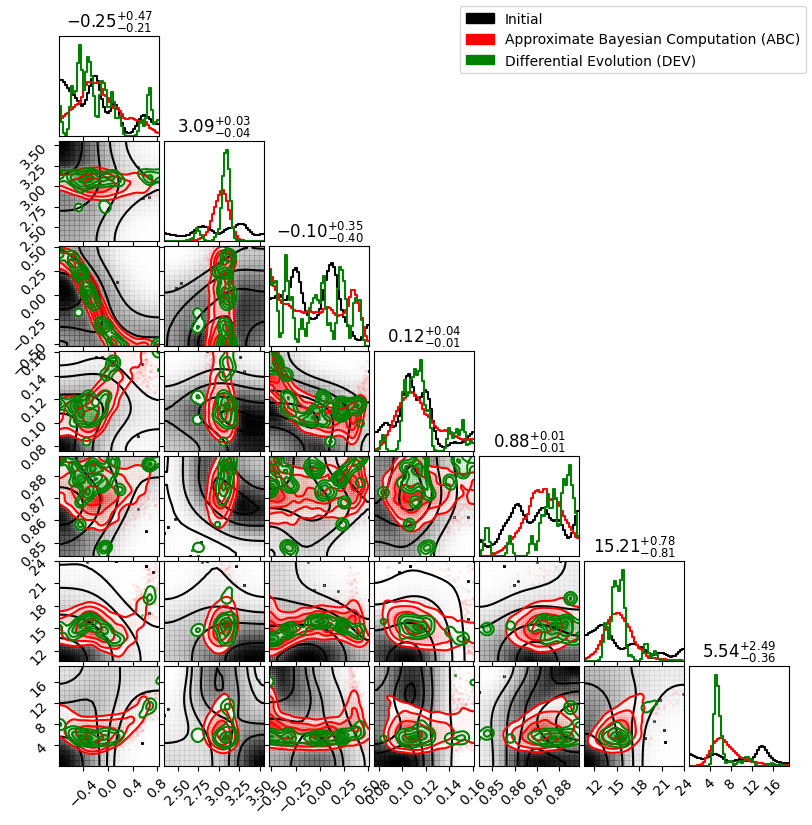

In [51]:
cfig = plt.figure(figsize=(8, 8))
corner.corner(all_data['initial']['particles'].T[autoflag].T, range=autorange[autoflag], fig=cfig, smooth=5.0, smooth1d=2.5, bins=20, hist_bin_factor=2.5)
corner.corner(all_data['abc_abc_2']['particles'].T[autoflag].T, range=autorange[autoflag], fig=cfig, color='r', smooth=2.0, smooth1d=1.0, bins=50, hist_bin_factor=1)
corner.corner(all_data['dev_dev_2']['particles'].T[autoflag].T, range=autorange[autoflag], fig=cfig, color='g', show_titles=True, smooth=2.0, smooth1d=1.0, bins=50, hist_bin_factor=1)
cfig.legend(handles=[
    Patch(facecolor='k', edgecolor='k', label="Initial"),
    Patch(facecolor='r', edgecolor='r', label="Approximate Bayesian Computation (ABC)"),
    Patch(facecolor='g', edgecolor='g', label="Differential Evolution (DEV)")
], loc='upper right')
plt.show()

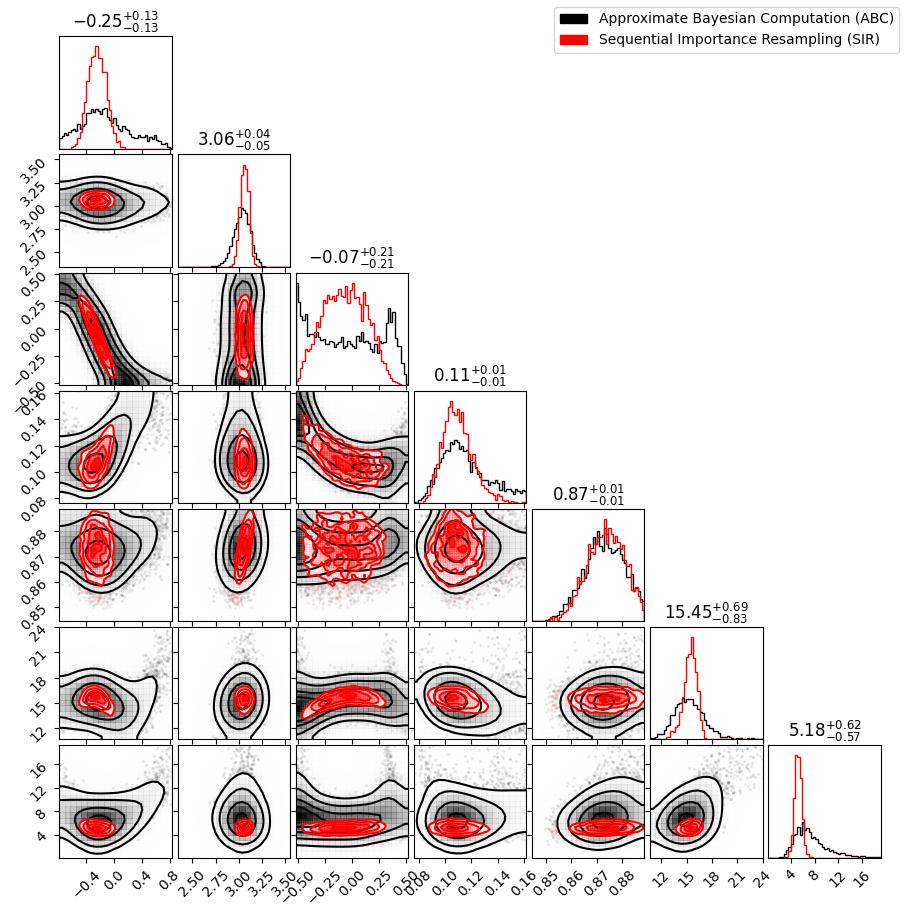

In [57]:
cfig = plt.figure(figsize=(9, 9))
corner.corner(all_data['abc_abc_2']['particles'].T[autoflag].T, range=autorange[autoflag], fig=cfig, smooth=2.0, bins=20, hist_bin_factor=2.5)
corner.corner(all_data['abc_sir_2']['particles'].T[autoflag].T, range=autorange[autoflag], fig=cfig, color='r', show_titles=True, smooth=1.0, bins=50, hist_bin_factor=1)
cfig.legend(handles=[
    Patch(facecolor='k', edgecolor='k', label="Approximate Bayesian Computation (ABC)"),
    Patch(facecolor='r', edgecolor='r', label="Sequential Importance Resampling (SIR)")
], loc='upper right')
plt.show()

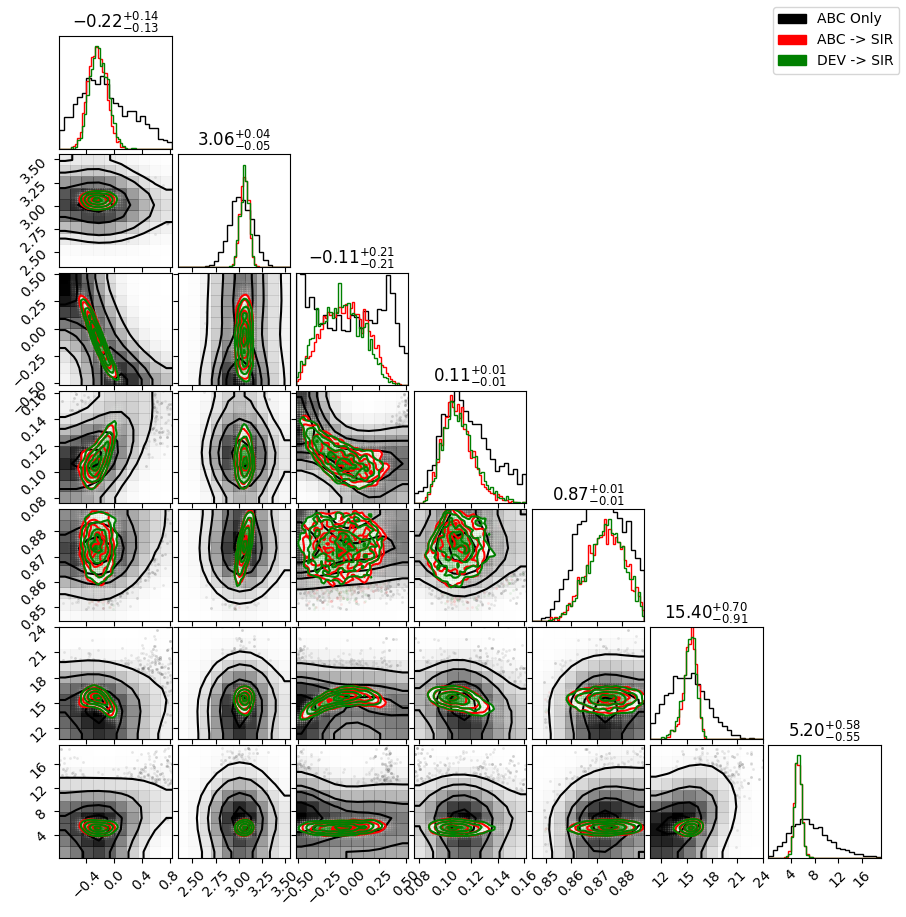

In [53]:
cfig = plt.figure(figsize=(9, 9))
corner.corner(all_data['abc_abc_1']['particles'].T[autoflag].T, range=autorange[autoflag], fig=cfig, smooth=2.0, bins=10, hist_bin_factor=2.5)
corner.corner(all_data['abc_sir_2']['particles'].T[autoflag].T, range=autorange[autoflag], fig=cfig, color='r', smooth=1.0, bins=50, hist_bin_factor=1)
corner.corner(all_data['dev_sir_2']['particles'].T[autoflag].T, range=autorange[autoflag], fig=cfig, color='g', show_titles=True, smooth=1.0, bins=50, hist_bin_factor=1)
cfig.legend(handles=[ 
    Patch(facecolor='k', edgecolor='k', label="ABC Only"),
    Patch(facecolor='r', edgecolor='r', label="ABC -> SIR"),
    Patch(facecolor='g', edgecolor='g', label="DEV -> SIR")
], loc='upper right')
plt.show()